### Problem Statement


A multinational e-commerce company idenified a segment of products which are showing less sales when comapred to other class of products. As the prices of those products are volatile periodically based on weekly price changes and other local factros such as city temparature, etc. 

They want to understand what is right price to quote on a given period for each product which will help them to increase the sales. The given data contains historical data of a product. Perform time series analysis and forecast the price.

In [2]:
# Load the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
data = pd.read_csv("./Data/ArimaxData.csv") # Reading the data 

In [4]:
data.shape  # check how many rows and columns

(155, 9)

In [5]:
data.head() # check the top 5 records

,Year,Week_Of_The_Year,quantityPerWeek,NoOfWeeklyPromotion,FractionOfWeeklyPriceChange,AverageWeeklyPriceChange,weeklyPromotion,meanTemperatureOfWeek,temperaturebins
0,2014,0,123,4,-2.00,-0.500000,Y,12.600000,1
1,2014,1,139,7,-3.50,-0.500000,Y,10.857143,1
2,2014,2,100,7,-3.50,-0.500000,Y,15.142857,2
3,2014,3,191,7,-0.43,-0.061429,Y,14.428571,2
4,2014,4,162,7,-0.42,-0.060000,Y,11.142857,1


In [6]:
data.info() # check the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         155 non-null    int64  
 1   Week_Of_The_Year             155 non-null    int64  
 2   quantityPerWeek              155 non-null    int64  
 3   NoOfWeeklyPromotion          155 non-null    int64  
 4   FractionOfWeeklyPriceChange  155 non-null    float64
 5   AverageWeeklyPriceChange     155 non-null    float64
 6   weeklyPromotion              155 non-null    object 
 7   meanTemperatureOfWeek        155 non-null    float64
 8   temperaturebins              155 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 11.0+ KB


In [7]:
data.dtypes # check the data types

Year                             int64
Week_Of_The_Year                 int64
quantityPerWeek                  int64
NoOfWeeklyPromotion              int64
FractionOfWeeklyPriceChange    float64
AverageWeeklyPriceChange       float64
weeklyPromotion                 object
meanTemperatureOfWeek          float64
temperaturebins                  int64
dtype: object

### Basic Data preprocessing

In [8]:
#added 0 only for demontration, you can remove it
data['formatted_date'] = data.Year * 1000 + data.Week_Of_The_Year * 10 
data['date'] = pd.to_datetime(data['formatted_date'], format='%Y%W%w')
data.tail()

,Year,Week_Of_The_Year,quantityPerWeek,NoOfWeeklyPromotion,FractionOfWeeklyPriceChange,AverageWeeklyPriceChange,weeklyPromotion,meanTemperatureOfWeek,temperaturebins,formatted_date,date
150,2016,44,645,7,0.10,0.014286,Y,16.857143,2,2016440,2016-11-06
151,2016,45,212,7,-0.62,-0.088571,Y,19.285714,2,2016450,2016-11-13
152,2016,46,712,7,0.80,0.114286,Y,16.000000,2,2016460,2016-11-20
153,2016,47,971,7,1.40,0.200000,Y,11.571429,1,2016470,2016-11-27
154,2016,48,227,3,0.30,0.100000,Y,10.000000,1,2016480,2016-12-04


In [9]:
data['weeklyPromotion'] = data['weeklyPromotion'].astype('category') # Convert 'SKU' variable to category
data['temperaturebins'] = data['temperaturebins'].astype('category') # Convert 'SKU' variable to category



In [10]:
data.describe(include='all') # check the summary of the data 

<ipython-input-10-5893eebaf9c5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all') # check the summary of the data


,Year,Week_Of_The_Year,quantityPerWeek,NoOfWeeklyPromotion,FractionOfWeeklyPriceChange,AverageWeeklyPriceChange,weeklyPromotion,meanTemperatureOfWeek,temperaturebins,formatted_date,date
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155,155.000000,155.0,1.550000e+02,155
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3.0,NaN,153
top,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,2.0,NaN,2016-01-03 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,123,NaN,80.0,NaN,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-04 00:00:00
mean,2014.974194,25.367742,294.806452,5.406452,-0.796258,-0.112449,NaN,18.188433,NaN,2.015228e+06,NaN
std,0.813429,15.019044,337.477678,2.712876,1.076761,0.164391,NaN,5.732410,NaN,8.192489e+02,NaN
min,2014.000000,0.000000,24.000000,0.000000,-5.600000,-0.800000,NaN,4.333333,NaN,2.014000e+06,NaN
25%,2014.000000,12.500000,109.500000,5.000000,-1.570000,-0.224286,NaN,13.857143,NaN,2.014385e+06,NaN


In [11]:
# let us delete Year and week of the year and formatted_date variables from the data
data = data.drop(["Year",'Week_Of_The_Year','formatted_date'], axis=1)

In [12]:
sorted_data = data.sort_values('date',ascending=True) # sort the data in the descending order 


In [13]:
sorted_data.head(10) # Check the top 10 records of the data 

,quantityPerWeek,NoOfWeeklyPromotion,FractionOfWeeklyPriceChange,AverageWeeklyPriceChange,weeklyPromotion,meanTemperatureOfWeek,temperaturebins,date
0,123,4,-2.00,-0.500000,Y,12.600000,1,2014-01-05
1,139,7,-3.50,-0.500000,Y,10.857143,1,2014-01-12
2,100,7,-3.50,-0.500000,Y,15.142857,2,2014-01-19
3,191,7,-0.43,-0.061429,Y,14.428571,2,2014-01-26
4,162,7,-0.42,-0.060000,Y,11.142857,1,2014-02-02
5,141,7,-0.70,-0.100000,Y,9.857143,1,2014-02-09
6,749,7,0.80,0.114286,Y,15.571429,2,2014-02-16
7,390,7,-0.10,-0.014286,Y,13.857143,2,2014-02-23
8,188,7,-0.70,-0.100000,Y,13.285714,2,2014-03-02
9,153,7,-0.70,-0.100000,Y,16.142857,2,2014-03-09


In [21]:
# get the min and max of data 

minDate = min(data.date)
maxDate = max(data.date)
print(minDate)
print(maxDate)

2014-01-05 00:00:00
2016-12-04 00:00:00


In [23]:
data.set_index('date',inplace=True)

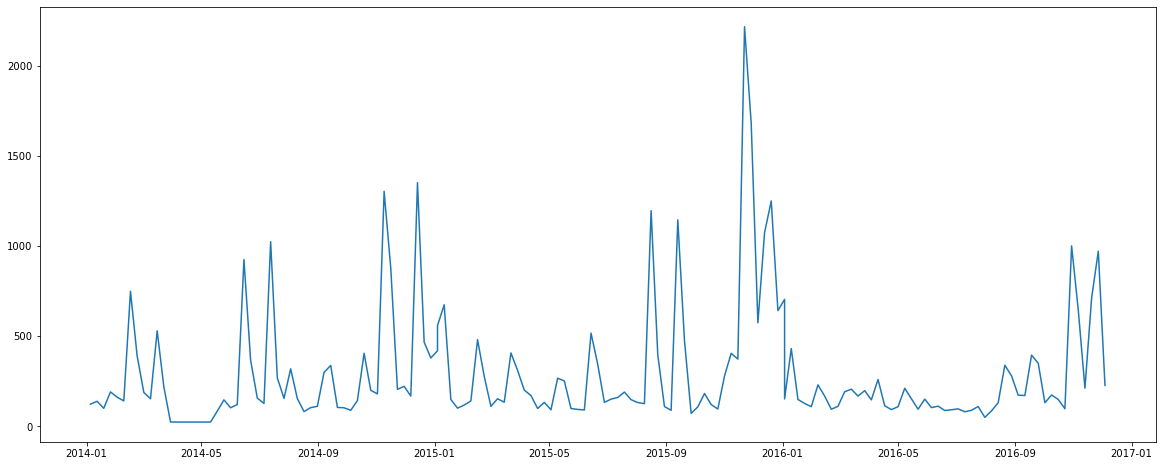

In [29]:
plt.figure(figsize=(20,8))
plt.plot(data.quantityPerWeek)

### Split the data into Train and Test

In [26]:
train = data.loc[data.index <'2016-11-06',]
test = data.loc[data.index >='2016-11-06',]

In [27]:
print(train.shape)
print(test.shape)

(150, 7)
(5, 7)


In [28]:
print(train.index.min())
print(train.index.max())
print(test.index.min())
print(test.index.max())

2014-01-05 00:00:00
2016-10-30 00:00:00
2016-11-06 00:00:00
2016-12-04 00:00:00


<Figure size 1440x576 with 0 Axes>

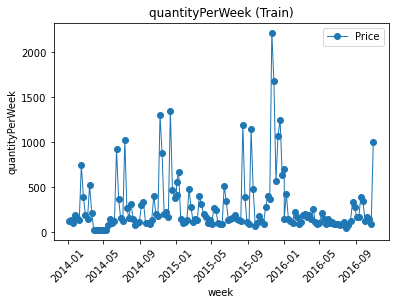

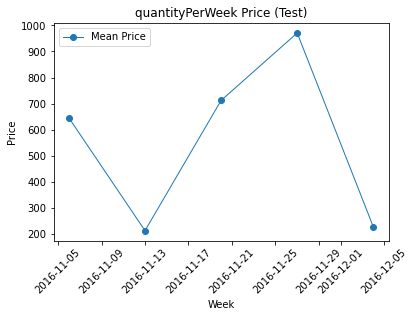

In [30]:
# Visualize train data
plt.figure(figsize=(20,8))
fig, ax = plt.subplots()
lines = plt.plot(train.index, train.quantityPerWeek, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('quantityPerWeek (Train)')
plt.xlabel('week')
plt.ylabel('quantityPerWeek')
plt.legend(['Price'],loc = 'best')
plt.show()
fig, ax = plt.subplots()
lines = plt.plot(test.index, test.quantityPerWeek, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('quantityPerWeek Price (Test)')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend(['Mean Price'],loc = 'best')
plt.show()

### Looking at the time series components

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [35]:
decomposition = seasonal_decompose(train.quantityPerWeek,freq=12)

<ipython-input-35-514de48e9579>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(train.quantityPerWeek,freq=12)


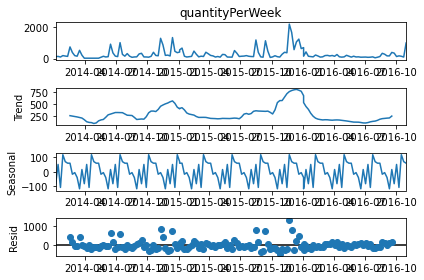

In [42]:
decomposition.plot()
plt.show()
#plt.figure(figsize=(20,8))


### Creating the dummy variables

In [43]:
train_dummy = pd.get_dummies(train,drop_first=True,dtype='int8')
test_dummy = pd.get_dummies(test,drop_first=True,dtype='int8')

In [44]:
print(train_dummy.columns)
print("\n")
print(test_dummy.columns)

print("\n No. of columns in Train Data :{}".format(len(train_dummy.columns)))
print("\n")
print(test_dummy.columns)
print("\n No. of columns in Test Data :{}".format(len(test_dummy.columns)))



Index(['quantityPerWeek', 'NoOfWeeklyPromotion', 'FractionOfWeeklyPriceChange',
       'AverageWeeklyPriceChange', 'meanTemperatureOfWeek',
       'weeklyPromotion_Y', 'temperaturebins_2', 'temperaturebins_3'],
      dtype='object')


Index(['quantityPerWeek', 'NoOfWeeklyPromotion', 'FractionOfWeeklyPriceChange',
       'AverageWeeklyPriceChange', 'meanTemperatureOfWeek',
       'weeklyPromotion_Y', 'temperaturebins_2', 'temperaturebins_3'],
      dtype='object')

 No. of columns in Train Data :8


Index(['quantityPerWeek', 'NoOfWeeklyPromotion', 'FractionOfWeeklyPriceChange',
       'AverageWeeklyPriceChange', 'meanTemperatureOfWeek',
       'weeklyPromotion_Y', 'temperaturebins_2', 'temperaturebins_3'],
      dtype='object')

 No. of columns in Test Data :8


### Alligning the Levels b/w Train and Test Data sets 

In [45]:
train_allign,test_allign = train_dummy.align(test_dummy, join='outer', axis=1,fill_value=0)

In [47]:
print(train_allign.columns)
print("\n")
print(test_allign.columns)

print("\n No. of columns in Train Data :{}".format(len(train_allign.columns)))
print("\n")
print(test_allign.columns)
print("\n No. of columns in Test Data :{}".format(len(test_allign.columns)))



Index(['quantityPerWeek', 'NoOfWeeklyPromotion', 'FractionOfWeeklyPriceChange',
       'AverageWeeklyPriceChange', 'meanTemperatureOfWeek',
       'weeklyPromotion_Y', 'temperaturebins_2', 'temperaturebins_3'],
      dtype='object')


Index(['quantityPerWeek', 'NoOfWeeklyPromotion', 'FractionOfWeeklyPriceChange',
       'AverageWeeklyPriceChange', 'meanTemperatureOfWeek',
       'weeklyPromotion_Y', 'temperaturebins_2', 'temperaturebins_3'],
      dtype='object')

 No. of columns in Train Data :8


Index(['quantityPerWeek', 'NoOfWeeklyPromotion', 'FractionOfWeeklyPriceChange',
       'AverageWeeklyPriceChange', 'meanTemperatureOfWeek',
       'weeklyPromotion_Y', 'temperaturebins_2', 'temperaturebins_3'],
      dtype='object')

 No. of columns in Test Data :8


### Time Series Modelling 

In [49]:
from sklearn import metrics

## Evaluating the model

In [50]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Test:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Test:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Test:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
        print('MAPE Test:', metrics.mean_absolute_percentage_error(test_act,test_pred))
        



In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## ACF and PACF

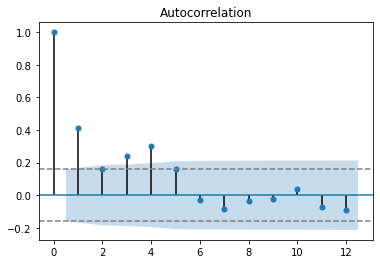

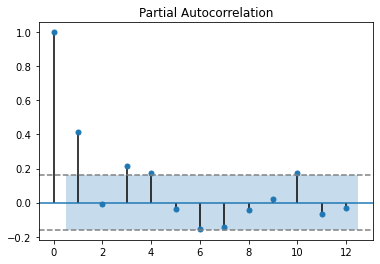

In [53]:
### ACF and PACF

#### ACF: n th lag of ACF is the correlation between a day and n days before that. 
#PACF: The same as ACF with all intermediate correlations removed.

#ACF
plot_acf(train.quantityPerWeek, zero=True, lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--',color='gray')

#PACF
plot_pacf(train.quantityPerWeek,zero=True,lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.show()



## ARIMA Model

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [57]:
model_arima = ARIMA(np.array(train_allign['quantityPerWeek']),order=(2,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1065.590
Date:                Fri, 04 Mar 2022   AIC                           2139.180
Time:                        18:44:08   BIC                           2151.196
Sample:                             0   HQIC                          2144.062
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0042      0.185      0.023      0.982      -0.358       0.366
ar.L2         -0.3024      0.126     -2.404      0.016      -0.549      -0.056
ma.L1         -0.5001      0.184     -2.717      0.0

In [62]:
arima_train_pred = model_arima_fit.predict(n_periods =len(train_allign))
print('number of records in Train: {} and Train Predicted {}'.format(len(train),len(arima_train_pred)))
arima_test_pred = model_arima_fit.forecast(steps= len(test_allign))
print('number of records in Test: {} and Test Predicted {}'.format(len(test),len(arima_test_pred)))


number of records in Train: 150 and Train Predicted 150
number of records in Test: 5 and Test Predicted 5


In [63]:
error_metrics(train.quantityPerWeek,arima_train_pred,test.quantityPerWeek,arima_test_pred)

*** Error metrics Train data ***
MAE Train: 173.05820932895205
MSE Train: 94440.29707130675
RMSE Train: 307.3114008156983
MAPE Train: 0.8367670606835771
***
 Error metrics Test Data ***
MAE Test: 227.14584347769178
MSE Test: 70839.24333596058
RMSE Test: 266.15642644122005
MAPE Test: 0.5164912770819386


## ARIMAX Model

In [64]:
model_arimax = ARIMA(train_allign['quantityPerWeek'],exog =train_allign[['weeklyPromotion_Y','NoOfWeeklyPromotion','FractionOfWeeklyPriceChange']] ,
                     order=(2,1,1))
model_arimax_fit = model_arimax.fit()
print(model_arimax_fit.summary())

C:\Users\Jagan Rajani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Jagan Rajani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Jagan Rajani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Jagan Rajani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary sta

                               SARIMAX Results                                
Dep. Variable:        quantityPerWeek   No. Observations:                  150
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1022.496
Date:                Fri, 04 Mar 2022   AIC                           2058.992
Time:                        18:49:24   BIC                           2080.019
Sample:                             0   HQIC                          2067.535
                                - 150                                         
Covariance Type:                  opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
weeklyPromotion_Y            -178.1882    161.361     -1.104      0.269    -494.450     138.073
NoOfWeeklyPromotion            87.9292     29.546      2.976      0.003      30.

C:\Users\Jagan Rajani\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
# Note that predict function is to be used 

arimax_train_pred = model_arimax_fit.predict(n_periods =len(train_allign)) # predicting on train 


In [68]:
# Note that forecast function is to be used and also need to pass the exogenous variables into the model
arimax_test_pred = model_arimax_fit.forecast(steps= len(test_allign),
                                             exog =test_allign[['weeklyPromotion_Y','NoOfWeeklyPromotion','FractionOfWeeklyPriceChange']] ) # forecast for the test


C:\Users\Jagan Rajani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [69]:
error_metrics(train.quantityPerWeek,arimax_train_pred,test.quantityPerWeek,arimax_test_pred)

*** Error metrics Train data ***
MAE Train: 148.20190705426526
MSE Train: 54412.298355504485
RMSE Train: 233.26443868602107
MAPE Train: 0.6927072477382946
***
 Error metrics Test Data ***
MAE Test: 125.66261417277094
MSE Test: 23434.14966613236
RMSE Test: 153.08216638829083
MAPE Test: 0.42010217532609573


In [102]:
model_arimax_forecast = pd.DataFrame(zip(data.index,np.append(arimax_train_pred,arima_test_pred)),columns=['Date','Forecast'])

In [103]:
model_arimax_forecast = model_arimax_forecast.set_index(model_arimax_forecast['Date'])

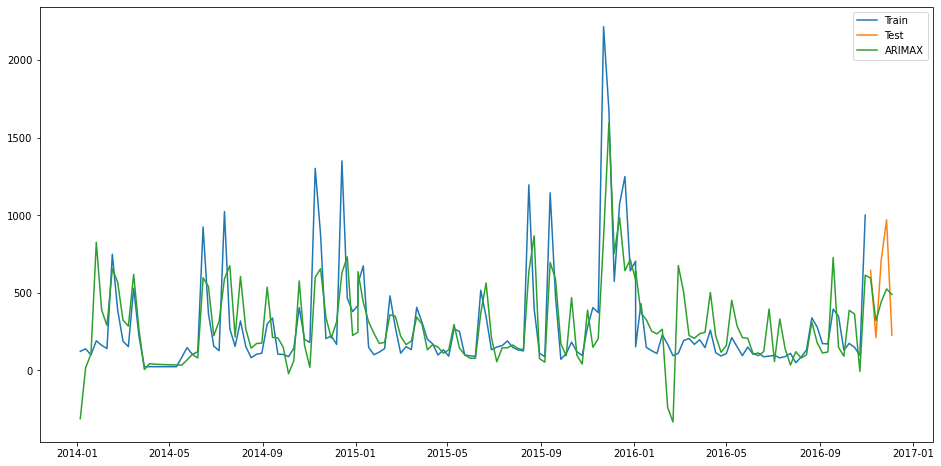

In [104]:
plt.figure(figsize=(16,8))
plt.plot( train['quantityPerWeek'], label='Train')
plt.plot(test['quantityPerWeek'], label='Test')
plt.plot(model_arimax_forecast.Forecast, label='ARIMAX')
plt.legend(loc='best')
plt.show()